In [5]:
data = start()

C:\Users\arjun\Documents\TS Math Project 5\data\117_723A.Godad.2011.lpd
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 117_723A.Godad.2011.lpd
Finished read: 1 record
extracting paleoData...
extracting: 117_723A.Godad.2011
Created time series: 7 entries
C:\Users\arjun\Documents\TS Math Project 5\data\161_976.Martrat.2014.lpd
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 161_976.Martrat.2014.lpd
Finished read: 1 record
extracting paleoData...
extracting: 161_976.Martrat.2014
Created time series: 11 entries
C:\Users\arjun\Documents\TS Math Project 5\data\165_1002C.Herbert.2000.lpd
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: 165_1002C.Herbert.2000.lpd
Finished read: 1 record
extracting paleoData...
extracting: 165_1002C.Herbert.2000
Created time series: 11 entries
C:\Users\arjun\Documents\TS Math Project 5\data\2005-804-006.Ledu.2010.lpd
Disclaimer: LiPD files may be updated 

In [8]:
illegal_nums = [2,6,21,38,78,79,113,122,130,132,143,144,205,212,220,
           230,231,253,255,285,304,338,353,371,395,416,433,453,
           478,481,482,490,506,520,527,532,544,562,570,580,583,
           595,600,602,603,604,608,624,628,635,639,649,665,677,695]
illegal = [[i for i in listdir() if i not in ['genetic_formatting.txt', '.ipynb_checkpoints']][i] for i in illegal_nums]
illegal.append('.ipynb_checkpoints')
illegal.append('genetic_formatting.txt')

In [7]:
import lipd
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from copy import deepcopy

from math import sin, pi, e

cwd = 'C:\\Users\\arjun\\Documents\\TS Math Project 5\\data'

def listdir():
    if os.getcwd()=='C:\\Users\\arjun\\Documents\\TS Math Project 5\\data':
        return os.listdir()
    else:
        return os.listdir('data')

def lpd(path):
    d = {}
    print(cwd+"\\"+path)
    for i in lipd.extractTs(lipd.readLipd(cwd+'\\'+path)):        
        if i["paleoData_variableName"] in ['age','temperature']:
            d[i["paleoData_variableName"]] = i["paleoData_values"]
    return d

def start():
    data = {}
    for file in listdir():
        if file.endswith('.lpd'):
            data[file]=lpd(file)
    return data

def frame(file, sort = False):
    if sort:
        return pd.DataFrame(data[file]).sort_values('age')
    else:
        return pd.DataFrame(data[file])

In [9]:
#ouput designed for LaTeX
count1 = 0
count2 = 1
L_bozo_list = []
ur_mom = []

print('The files that have conflicting lengths:\n')

llist = [i for i in listdir() if i not in ['genetic_formatting.txt', '.ipynb_checkpoints']]

for file in (llist):
    try:
        if count2<10:
            n = '  '
        else:
            n = ' '
        if len(data[llist[count1]]['age'])!=len(data[llist[count1]]['temperature']):
            L_bozo_list.append(count1)
            print(f"{count2}.{n}[{count1}][{llist[count1]}] {len(data[llist[count1]]['age']),len(data[llist[count1]]['temperature'])}")
            count2+=1
    except:
        L_bozo_list.append(count1)
        ur_mom.append(count1)
        
    finally:
        count1+=1 
        
print("\nThe files in which 'temperature' doesn't exist:\n")

count3 = 1
for item in ur_mom:
    if count3<10:
            n = '  '
    else:
            n = ' '
    print(f"{count3}.{n}[{item}][{llist[item]}]")
    count3+=1

The files that have conflicting lengths:

1.  [2][165_1002C.Herbert.2000.lpd] (303, 280)
2.  [6][850Lake.Shemesh.2001.lpd] (56, 125)
3.  [38][BC01Lake.Peros.2010.lpd] (62, 29)
4.  [371][M75_3_137_3.Wang.2013.lpd] (136, 121)
5.  [395][MD03_2607-Assemblage.LopesdosSantos.2013.lpd] (172, 83)
6.  [416][MD97_2120.Pahnke.2006.lpd] (1706, 365)
7.  [433][MD99-2322.Jennings.2011.lpd] (579, 120)
8.  [544][Qipisarqo.Frechette.2009.lpd] (43, 50)
9.  [595][SO90_56KA.Doose-Rolinski.2001.lpd] (119, 234)
10. [603][Spaime.Hammarlund.2004.lpd] (41, 57)
11. [635][Tibetanus.Hammarlund.2002.lpd] (60, 45)
12. [649][Troll28-03.Klitgard-Kristensen.2001.lpd] (89, 59)

The files in which 'temperature' doesn't exist:

1.  [21][Ammersee.vonGrafenstein.1996.lpd]
2.  [78][Century.Johnsen.1972.lpd]
3.  [79][CF8.Axford.2011.lpd]
4.  [113][DevonIceCap.Paterson.1977.lpd]
5.  [122][Dye3.Vinther.2006.lpd]
6.  [130][Eleanor.Gavin.2011.lpd]
7.  [132][ElGygytgynCrater.Schwamborn.2006.lpd]
8.  [143][Farewell.Hu.1998.lpd]
9. 

In [10]:
lstdir = listdir()

In [11]:
def legal():
    return [x for x in lstdir if x not in illegal]

In [12]:
for file in legal():
    if frame(file).replace('nan',np.nan).isna().describe()['temperature']['freq'] != len(frame(file)) or frame(file).replace('nan',np.nan).isna().describe()['age']['freq'] != len(frame(file)):
        try:
            lstdir.remove(file)
        except:
            pass

In [13]:
#choices = random.sample(legal(),5)
choices = [
'DempsterPeatland.Porter.2019.lpd',
 'BloodPond.Marsicek.2013.lpd',
 'HomesteadScarp.McGlone.2010.lpd',
 'DajiuhuPeatland.Huang.2013.lpd',
 'MiddenCluster6.Harbert.2018.lpd'
]

In [14]:
highest_low = -(10**6)
lowest_high = 10**6

low_file = ''
high_file = ''

for i in choices:
    #print(i)
    if frame(i,True)['age'][0] > highest_low:
        highest_low = frame(i,True)['age'][0]
        low_file = i
    if frame(i,True)['age'].to_list()[-1] < lowest_high:
        lowest_high = frame(i,True)['age'].to_list()[-1]
        high_file = i
        
print(f"Highest First Value: {highest_low} (from {low_file})")
print(f"Lowest Last Value: {lowest_high} (from {high_file})")
print(f"Difference: {lowest_high-highest_low}")
#((highest_low, low_file), (lowest_high, high_file)), lowest_high-highest_low

Highest First Value: 183.33 (from DajiuhuPeatland.Huang.2013.lpd)
Lowest Last Value: 12246.9 (from HomesteadScarp.McGlone.2010.lpd)
Difference: 12063.57


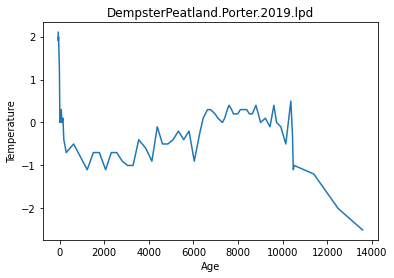

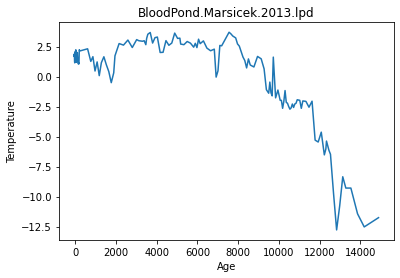

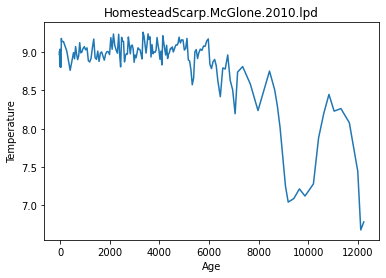

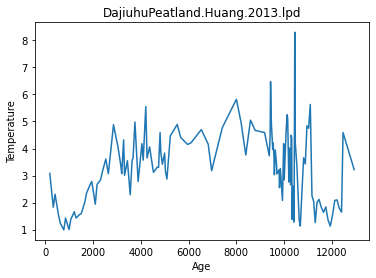

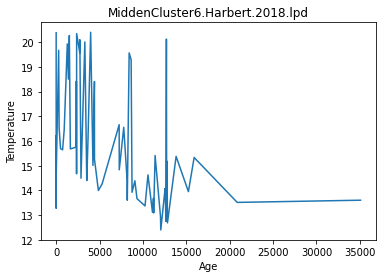

In [15]:
for i in choices:
    plt.figure()
    plt.xlabel('Age')
    plt.ylabel('Temperature')
    plt.title(i)
    plt.plot(frame(i,True)['age'],frame(i,True)['temperature'])

In [16]:
desired_x = [x*10 for x in list(range(int((highest_low+10)//10),int((lowest_high)//10)+1))]

In [17]:
final_frames = {}
for choice in choices:
    age = frame(choice)['age'].to_list()+[x for x in desired_x if x not in frame(choice)['age'].to_list()]
    temp = frame(choice)['temperature'].to_list()+[np.nan for i in range(len([x for x in desired_x if x not in frame(choice)['age'].to_list()]))]
    df = pd.DataFrame([age,temp]).transpose().rename(columns = {0:'age',1:'temperature'}).sort_values('age').interpolate()
    final_frames[choice] = df[df['age'].isin(desired_x)].reset_index(drop = True)

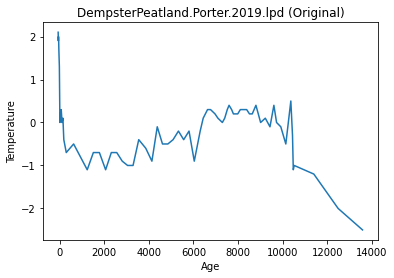

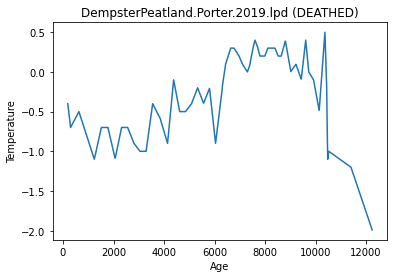

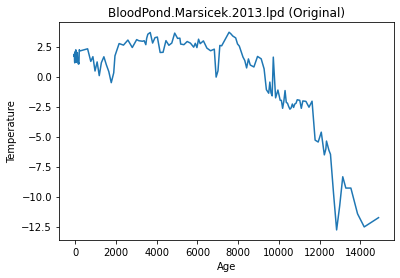

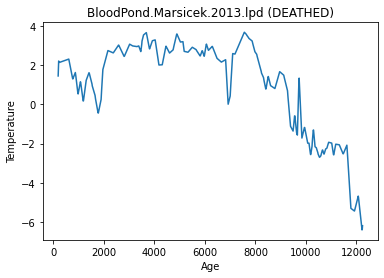

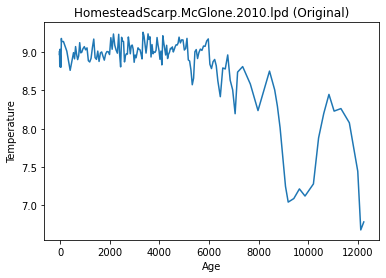

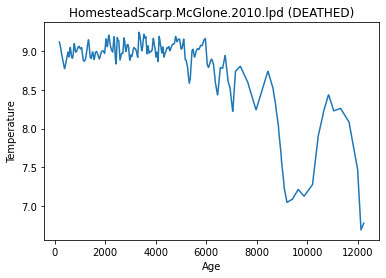

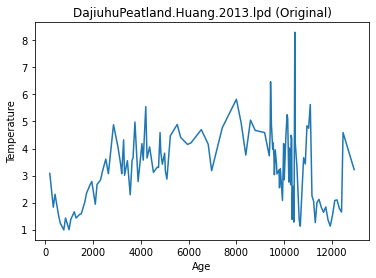

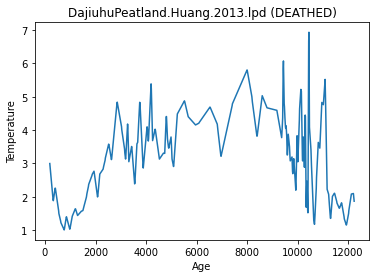

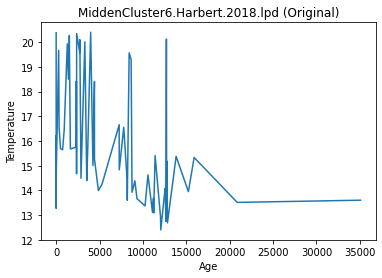

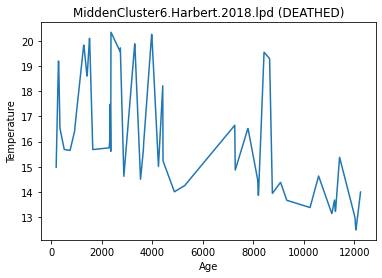

In [18]:
#prints the plot of the data in its original form, and then the interpolated version below
for file, dframe in final_frames.items():
    plt.figure()
    plt.xlabel('Age')
    plt.ylabel('Temperature')
    plt.title(f"{file} (Original)")
    plt.plot(frame(file,True)['age'],frame(file,True)['temperature'])
    
    plt.figure()
    plt.xlabel('Age')
    plt.ylabel('Temperature')
    plt.title(f"{file} (DEATHED)")
    plt.plot(dframe['age'],dframe['temperature'])

In [20]:
megadf = 0
for file, dframe in final_frames.items():
    megadf += dframe
megadf /= 5
megadf

,age,temperature
0,190.0,5.629862
1,200.0,5.777043
2,210.0,5.919224
3,220.0,5.982833
4,230.0,6.046443
...,...,...
1201,12200.0,2.875129
1202,12210.0,2.868347
1203,12220.0,2.846065
1204,12230.0,2.856716


In [84]:
megadf.temperature[0:12].mean()

6.0970873766708324

In [80]:
-1*(-len(megadf)//12),len(megadf)//100

(101, 12)

In [309]:
x_ = []
y_ = []
for i in range(-1*(-len(megadf)//12)):
    x_.append(megadf.age[12*i])
    y_.append(megadf.temperature[12*i:13*i].mean())
sample_ = pd.DataFrame()
sample_['age'] = x_
sample_['temperature'] = y_
sample_.temperature[0] = 5.629862

In [310]:
sample_

,age,temperature
0,190.0,5.629862
1,310.0,6.097531
2,430.0,5.727726
3,550.0,5.566647
4,670.0,5.395982
...,...,...
96,11710.0,3.085274
97,11830.0,2.984757
98,11950.0,2.946530
99,12070.0,2.910656


In [311]:
for i in range(500):
    for i in [2*x-1 for x in list(range(1,-1*(-len(sample_)//2)))]:
        sample_.temperature[i] = (sample_.temperature[i-1]+sample_.temperature[i+1])/2

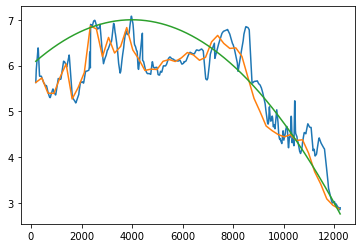

In [312]:
plt.figure()
plt.plot(megadf.age,megadf.temperature)
plt.plot(sample_.age,sample_.temperature)
plt.plot(megadf['age'],megadf['Function 1'])

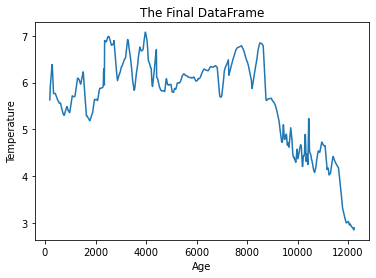

In [43]:
plt.figure()
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('The Final DataFrame')
plt.plot(megadf['age'],megadf['temperature'])

In [24]:
def get(n, index = False):
    if index:
        return megadf.set_index('age').iloc[n][0]
    else:
        return megadf.set_index('age').loc[n][0]

In [25]:
megadf.describe()

,age,temperature
count,1206.0000,1206.000000
mean,6215.0000,5.657444
std,3482.8652,0.951690
min,190.0000,2.846065
25%,3202.5000,5.208478
50%,6215.0000,5.946068
75%,9227.5000,6.318739
max,12240.0000,7.077167


In [26]:
(megadf['temperature']//1).to_list().index(2)

1174

In [27]:
get(12000)

3.027111295352269

In [28]:
get(4000)

7.012902746798913

In [29]:
get(1174,True)

2.9958125361813375

In [30]:
megadf.iloc[1174]

age            11930.000000
temperature        2.995813
Name: 1174, dtype: float64

In [31]:
megadf.iloc[377]

age            3960.000000
temperature       7.037402
Name: 377, dtype: float64

In [32]:
flipped = deepcopy(megadf)
flipped['age'] *= -1

<AxesSubplot:xlabel='age'>

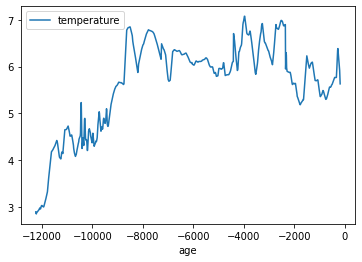

In [33]:
flipped.sort_values('age').reset_index(drop = True).plot('age')

In [163]:
def function1(x):
    return (-0.0000000625)*(x-4000)**2+7

In [164]:
megadf['Function 1'] = [function1(x) for x in megadf['age']]

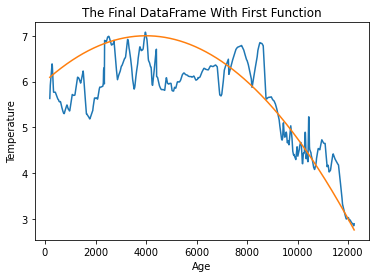

In [104]:
plt.figure()
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('The Final DataFrame With First Function')
plt.plot(megadf['age'],megadf['temperature'])
plt.plot(megadf['age'],megadf['Function 1'])

In [101]:
mean_squared_error(y_true = megadf['temperature'],  y_pred = megadf['Function 1'], squared = False)

0.6236170763445439

In [48]:
def function2(x):
    return (-0.000000045)*(x-4000)**2+6.5+0.5*sin(0.01*x)

In [49]:
megadf['Function 2'] = [function2(x) for x in megadf['age']]

In [50]:
r2_score(y_true = megadf['temperature'],  y_pred = megadf['Function 2'])

0.6401404253943973

In [51]:
r2_score(y_true = megadf['temperature'],  y_pred = megadf['Function 1'])

0.5388790869072642

In [58]:
mlist = [(list(megadf.drop(columns=[i for i in megadf.columns if i not in ['age', 'temperature']]).transpose()[i])) for i in megadf.drop(columns=[i for i in megadf.columns if i not in ['age', 'temperature']]).transpose()]
with open('genetic_formatting.txt', 'w') as f:
    for a,b in mlist:
        f.write(f"{a} {b}")
        f.write('\n')
    f.close()

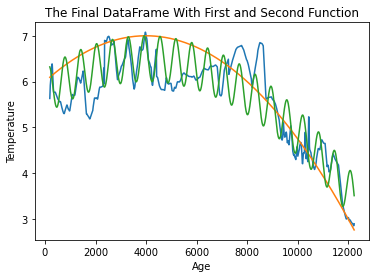

In [62]:
plt.figure()
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('The Final DataFrame With First and Second Function')
plt.plot(megadf['age'],megadf['temperature'])
plt.plot(megadf['age'],megadf['Function 1'])
plt.plot(megadf['age'],megadf['Function 2'])

In [122]:
def function3b(x):#1.2e^{-\left(0.001\left(x-3000\right)\right)^{2}}\cdot0.5*\sin(0.01*x)
    a = 1.2*e**(-(0.001*(x-3000))**2)*0.5*sin(0.01*x)
    b = 1*e**(-(0.0007*(x-1000))**2)*0.5*sin(0.006*(x+50))
    c = 0.9*e**(-(0.002*(x-8200))**2)*0.6*sin(0.009*x)
    d = (0.5*e**(-(0.001*(x-11000))**2))*1.0*sin(0.01*x)
    return a + b + c + d

def function3(x):
    #return (-0.000000045)*(x-4000)**2+5.5+0.5*sin(0.01*x)-0.6*sin(0.0013*x+1)+0.0001*x+1.2*e**(-(0.0005*(x))**2)+0.8*e**(-(0.0005*(x-5000))**2)
    #(-0.000000045)*(x-4000)^{2}+6.5+0.8e^{-\left(0.0005\left(x-3000\right)\right)^{2}}+-0.8e^{-\left(0.0008\left(x-5500\right)\right)^{2}}+e^{-\left(0.0008\left(x-7000\right)\right)^{2}}
    a = (-0.000000045)*(x-4000)**2+6.5
    b = 0.2*e**(-(0.0008*(x-3000))**2)
    c = -0.4*e**(-(0.0008*(x-5000))**2)
    d = 0.7*e**(-(0.0008*(x-8000))**2)
    f = -0.4*e**(-(0.0008*(x-10000))**2)
    g = -0.6*e**(-(0.0008*(x-900))**2)
    h = -0.7*e**(-(0.002*(x-12300))**2)
    return a + b + c + d + f + g + h + function3b(x)

In [123]:
megadf['Function 3'] = [function3(x) for x in megadf['age']]

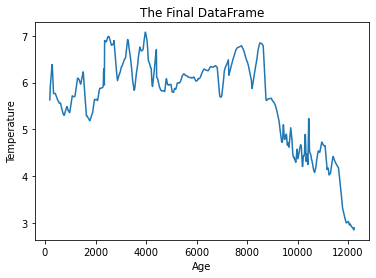

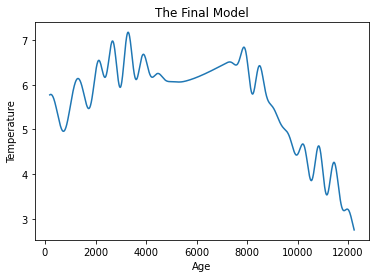

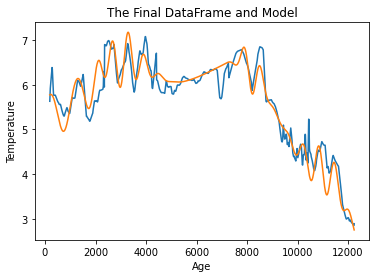

In [124]:
plt.figure()
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('The Final DataFrame')
plt.plot(megadf['age'],megadf['temperature'])
plt.figure()
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('The Final Model')
plt.plot(megadf['age'],megadf['Function 3'])
plt.figure()
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('The Final DataFrame and Model')
plt.plot(megadf['age'],megadf['temperature'])
plt.plot(megadf['age'],megadf['Function 3'])

In [67]:
mean_squared_error(y_true = megadf['temperature'],  y_pred = megadf['Function 3'])

0.08951430769996849

In [68]:
r2_score(y_true = megadf['temperature'],  y_pred = megadf['Function 3'])

0.9010851388169703

In [69]:
list(final_frames)

['DempsterPeatland.Porter.2019.lpd',
 'BloodPond.Marsicek.2013.lpd',
 'HomesteadScarp.McGlone.2010.lpd',
 'DajiuhuPeatland.Huang.2013.lpd',
 'MiddenCluster6.Harbert.2018.lpd']

<AxesSubplot:xlabel='age'>

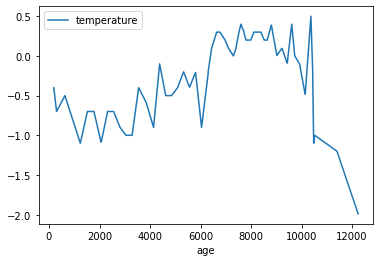

In [42]:
one = final_frames['DempsterPeatland.Porter.2019.lpd']
one.plot('age')

In [43]:
one.describe()

,age,temperature
count,1206.0000,1206.000000
mean,6215.0000,-0.478814
std,3482.8652,0.554007
min,190.0000,-1.990588
25%,3202.5000,-0.884462
50%,6215.0000,-0.500000
75%,9227.5000,0.040682
max,12240.0000,0.500000


In [44]:
def get_from(df, n, index = False):
    if index:
        return df.set_index('age').iloc[n][0]
    else:
        return df.set_index('age').loc[n][0]

In [45]:
get_from(one, 10370)

0.5

In [46]:
get_from(one, 2000)

-1.003448275862069

<AxesSubplot:xlabel='age'>

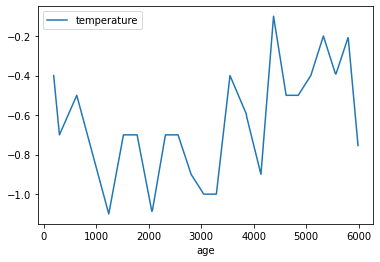

In [47]:
one[(one['age'] > 0) & (one['age'] < 6000)].plot('age')

In [48]:
def one_function1(x):
    return (-0.75)*sin((x+2185)*2*pi/16470)-0.25

In [49]:
one['Function 1'] = [one_function1(i) for i in one['age']]

<AxesSubplot:xlabel='age'>

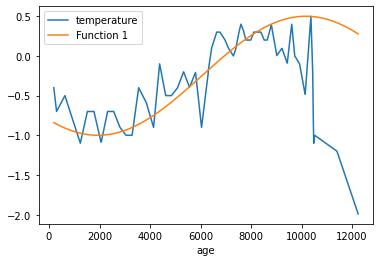

In [50]:
one.plot('age')

In [51]:
def one_function2(x):
    return (-0.75)*sin((x+2185)*2*pi/16470)-0.25+0.3*sin(0.005*x)

In [52]:
one['Function 2'] = [one_function2(i) for i in one['age']]

<AxesSubplot:xlabel='age'>

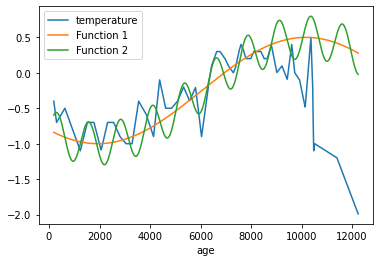

In [53]:
one.plot('age')

In [54]:
mean_squared_error(one['temperature'], one['Function 1'], squared = False)

0.7267139309118534

In [55]:
r2_score(one['temperature'], one['Function 2'])

-0.8087370257595397

In [56]:
megadf.corr()

,age,temperature,Function 1,Function 2
age,1.000000,-0.605489,-0.818113,-0.754187
temperature,-0.605489,1.000000,0.871392,0.816258
Function 1,-0.818113,0.871392,1.000000,0.921347
Function 2,-0.754187,0.816258,0.921347,1.000000


In [57]:
list(final_frames)

['DempsterPeatland.Porter.2019.lpd',
 'BloodPond.Marsicek.2013.lpd',
 'HomesteadScarp.McGlone.2010.lpd',
 'DajiuhuPeatland.Huang.2013.lpd',
 'MiddenCluster6.Harbert.2018.lpd']

In [58]:
two = final_frames['BloodPond.Marsicek.2013.lpd']

<AxesSubplot:xlabel='age'>

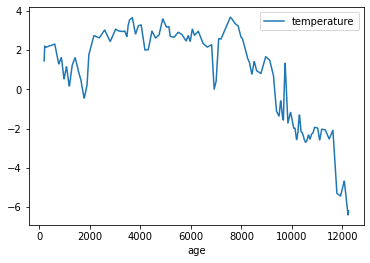

In [61]:
two.plot('age')

In [62]:
get_from(two, 12000)

-5.0394355635

In [70]:
def two_function1(x):
    return (-1/6400000)*(x-4000)**2+4

In [71]:
two['Function 1'] = [two_function1(x) for x in two['age']]

<AxesSubplot:xlabel='age'>

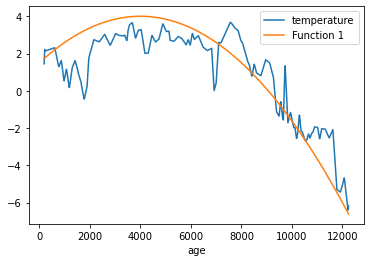

In [72]:
two.plot('age')

In [113]:
r2_score(two['temperature'], two['Function 1'])

0.712159488995233

In [170]:
def two_function2(x):
    return (-0.00000012625)*(x-4400)**2+3.5+sin(0.0075*x)

In [171]:
two['Function 2'] = [two_function2(x) for x in two['age']]

<AxesSubplot:xlabel='age'>

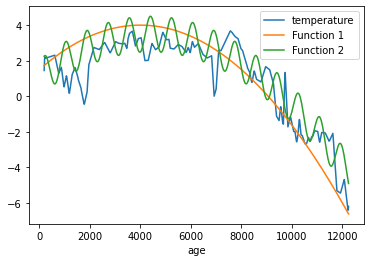

In [172]:
two.plot('age')

In [222]:
r2_score(two['temperature'], two['Function 2'])

0.680514394064726

In [174]:
list(final_frames)

['DempsterPeatland.Porter.2019.lpd',
 'BloodPond.Marsicek.2013.lpd',
 'HomesteadScarp.McGlone.2010.lpd',
 'DajiuhuPeatland.Huang.2013.lpd',
 'MiddenCluster6.Harbert.2018.lpd']

In [175]:
three = final_frames['HomesteadScarp.McGlone.2010.lpd']

<AxesSubplot:xlabel='age'>

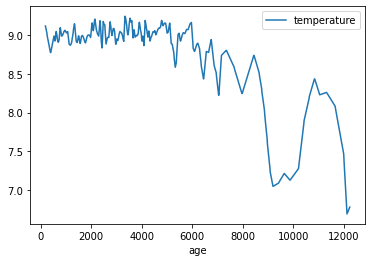

In [177]:
three.plot('age')

In [178]:
# seems too difficult to even attempt at modeling

In [179]:
# move on to fourth

In [180]:
four = final_frames['DajiuhuPeatland.Huang.2013.lpd']

<AxesSubplot:xlabel='age'>

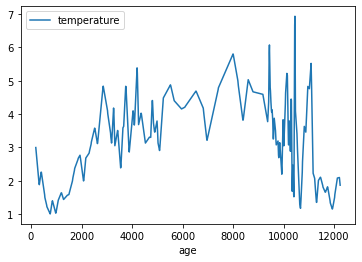

In [183]:
four.plot('age')

<AxesSubplot:xlabel='age'>

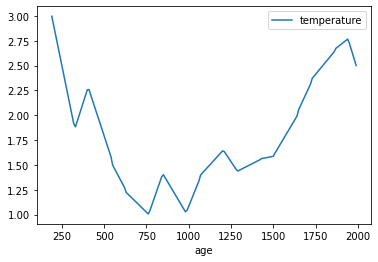

In [185]:
four[(four['age'] > 0) & (four['age']<2000)].plot('age')

In [215]:
def four_function1(x):
    return (-0.0000001)*(x-7000)**2+5

In [216]:
four['Function 1'] = [four_function1(x) for x in four['age']]

<AxesSubplot:xlabel='age'>

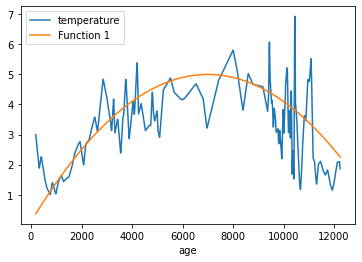

In [217]:
four.plot('age')

In [218]:
def four_function2(x):
    return (-0.0000001)*(x-7000)**2+5+sin(0.01*x)

In [219]:
four['Function 2'] = [four_function2(x) for x in four['age']]

<AxesSubplot:xlabel='age'>

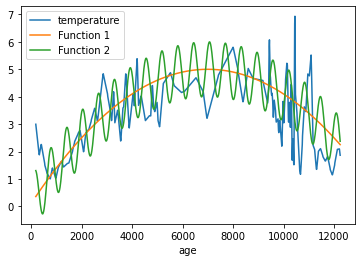

In [220]:
four.plot('age')

In [224]:
r2_score(four['temperature'], four['Function 1'])

0.5457512593994214

In [225]:
r2_score(four['temperature'], four['Function 2'])

0.13704996465630104

In [227]:
# epic fail, looks difficult to improve

In [228]:
list(final_frames)

['DempsterPeatland.Porter.2019.lpd',
 'BloodPond.Marsicek.2013.lpd',
 'HomesteadScarp.McGlone.2010.lpd',
 'DajiuhuPeatland.Huang.2013.lpd',
 'MiddenCluster6.Harbert.2018.lpd']

In [229]:
five = final_frames['MiddenCluster6.Harbert.2018.lpd']

<AxesSubplot:xlabel='age'>

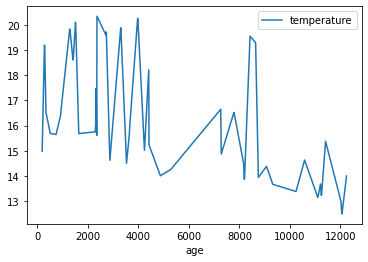

In [231]:
five.plot('age')

In [232]:
def five_function1(x):
    return (-x/3000)+17

In [233]:
five['Function 1'] = [five_function1(x) for x in five['age']]

<AxesSubplot:xlabel='age'>

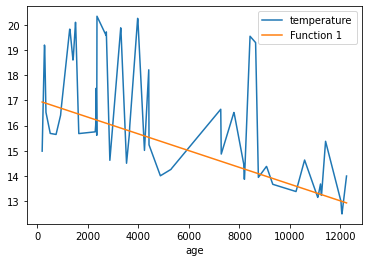

In [235]:
five.plot('age')

In [244]:
def five_function2(x):
    return (-x/3000)+19 + 2*sin(0.01*x)

In [245]:
five['Function 2'] = [five_function2(x) for x in five['age']]

<AxesSubplot:xlabel='age'>

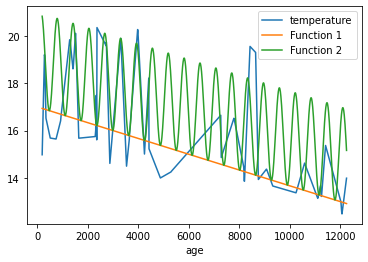

In [248]:
five.plot('age')

In [250]:
r2_score(five['temperature'],five['Function 1'])

0.22247084592783595

In [251]:
r2_score(five['temperature'],five['Function 2'])

-0.47815724169885687

In [252]:
# how come. the model. is worse. when i make it better.

In [253]:
# another epic fail

In [254]:
# and thats probably a wrap

In [256]:
# bye guys

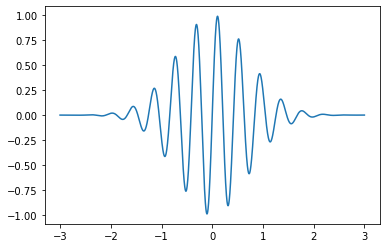

In [121]:
plt.figure()
plt.plot(np.arange(-3,3,0.001), [sin(15*x)*(e**(-(x**2))) for x in np.arange(-3,3,0.001)])